# 1-Dimensional Time-independent Schrödinger Equation



The 1-dimensional time-dependent Schrödinger equation is given by:

$$
i \hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x,t) \Psi(x,t)
$$

Where:
- $\Psi(x,t)$ is the wave function of the particle,
- $\hbar$ is the reduced Planck's constant,
- $m$ is the mass of the particle,
- $V(x,t)$ is the potential energy,
- $x$ is the position,
- $t$ is the time.

It's easy to prove that if 
$$
V(x,t)=V(x),\; \forall t \in \mathbb{R}
$$
the wave functions that solve the Schrödinger equations have the following form:
$$
\Psi(x,t)=\phi_n(t)\psi_n(x) = e^{-i\frac{E_n}{\hbar}t}\psi_n(x),
$$
where $E_n$ and $\psi_n(x)$ are respectively the n-th eigenvalue and its corresponding normalized eigenfunction that solve the following equation (**time independent Schrödinger equation**):
$$
\hat{H}\psi(x)=E\psi(x).
$$
The hamiltonian operator $\hat{H}$ is defined as follows:
$$
\hat{H}=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x),
$$
So we can finally express the time independent Schrödinger equation as:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x).
$$


Now the question is: how can we solve numerically the time-independent Schrödinger equation????

Here I'll try to explain it in the case of a **particle bounded in a certain region of space**.

**Step #1: Let's bound our particle**<br>
We assume that our particle is bounded in a region of the space $x \in (0,L)$.
This assumption is not so limiting, in fact this implies that the square module of the wave-function $|\psi(x)|^2$ is such that
$$
|\psi(x)|^2 = 0,\;x \leq 0 \land x\geq L,
$$
in other words, the probability to find the particle in the region of space out of the interval $(0,L)$ is 0.
This is a reasonable assumption since generally the probability of finding the particle for regions that are too far from our region of interest tends to be 0.
It also means that the real and imaginary parts of the wave function also tend to 0.
So we can rewrite out problem as follows:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x),\;\;x\in(0,L),\;\;\psi(0)=\psi(L)=0. 
$$

**Step #2: Discretization**<br>
We need to move from a continuous domain in space to a discrete domain in space. So we divide our continuous domain into $n$ tiny equally sized intervals. By doing this, it's easy to see that we can focus just on $n+1$ points: $x_0,x_1,...x_n$.
We also need to find a good approximantion of the second derivative of a function evaluated with these points.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import math
from IPython.display import HTML

N = 500
dy = 1/N
y = np.linspace(0,1,N+1)

In [8]:
def mL2V(y):
    return 1000*(y-0.5)**2

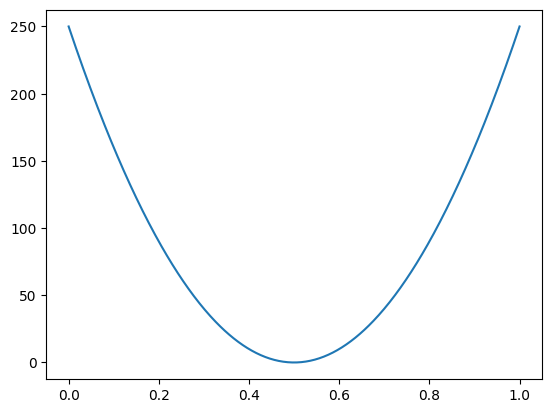

In [9]:
V = mL2V(y)
plt.plot(y,V)